In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv("way_points_20220421.csv")
test=pd.read_csv("test.csv")
sample=pd.read_csv("sample_submit.csv")

In [24]:
df

,point_name,N_10,E_10
0,ABASA,24.439172,123.252322
1,ABASI,44.000319,144.142750
2,ABECK,32.903744,130.818442
3,ABENO,34.592342,135.698769
4,ABKMA,37.095947,140.421667
...,...,...,...
2487,ZOROH,33.911381,133.796692
2488,ZUKKN,43.288111,141.144761
2489,ZUNDA,38.172353,140.452144
2490,ZUSHI,35.057283,139.523889


In [25]:
test

,index,point_name
0,0,ABASA
1,1,ABASI
2,2,ABBOT
3,3,ABENO
4,4,ABKMA
...,...,...
2039,2039,ZELDA
2040,2040,ZOROH
2041,2041,ZUNDA
2042,2042,ZUSHI


In [26]:
sample

,0,30,120
0,1,30,120
1,2,30,120
2,3,30,120
3,4,30,120
4,5,30,120
...,...,...,...
2038,2039,30,120
2039,2040,30,120
2040,2041,30,120
2041,2042,30,120


In [27]:
print(df.isna().sum())

point_name    0
N_10          0
E_10          0
dtype: int64


In [28]:
print(df.describe())

              N_10         E_10
count  2492.000000  2492.000000
mean     34.725824   135.989750
std       4.567035     5.383456
min      21.000000   122.550000
25%      33.175831   131.592253
50%      34.841157   136.641197
75%      36.488071   140.253549
max      49.710000   162.310000


In [29]:
sub=pd.merge(test,df,how='left',on="point_name")
sub

,index,point_name,N_10,E_10
0,0,ABASA,24.439172,123.252322
1,1,ABASI,44.000319,144.142750
2,2,ABBOT,NaN,NaN
3,3,ABENO,34.592342,135.698769
4,4,ABKMA,37.095947,140.421667
...,...,...,...,...
2039,2039,ZELDA,34.322558,135.088317
2040,2040,ZOROH,33.911381,133.796692
2041,2041,ZUNDA,38.172353,140.452144
2042,2042,ZUSHI,35.057283,139.523889


In [30]:
print(sub.isna().sum())

index           0
point_name      0
N_10          268
E_10          268
dtype: int64


In [31]:
print(sub.describe())

             index         N_10         E_10
count  2044.000000  1776.000000  1776.000000
mean   1021.500000    34.789093   135.819824
std     590.196295     4.647902     5.394385
min       0.000000    21.000000   122.550000
25%     510.750000    33.189217   131.605908
50%    1021.500000    34.724735   135.805469
75%    1532.250000    36.837935   140.082327
max    2043.000000    49.710000   162.310000


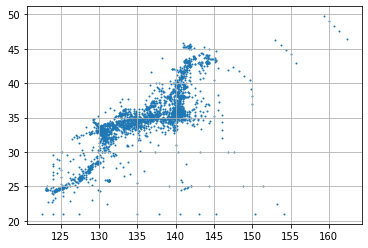

In [32]:
plt.scatter(df["E_10"],df["N_10"],s=1)
plt.grid(True)

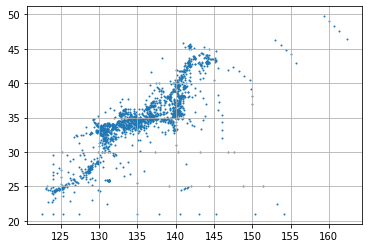

In [33]:
plt.scatter(sub["E_10"],sub["N_10"],s=1)
plt.grid(True)

In [34]:
#2022年のウェイポイント名と2018年のウェイポイント名を取り出す
namelist_2018 = test['point_name'].unique()
namelist_2022 = df['point_name'].unique()
#重複する都市名を抽出
duplicate_name = set(namelist_2018) & set(namelist_2022)
#2022年にのみ存在するウェイポイント名を取り出す
name_only2022 = set(namelist_2022) ^ set(duplicate_name)
#2018年にのみ存在するウェイポイント名を取り出す
name_only2018 = set(namelist_2018) ^ set(duplicate_name)

In [35]:
print(len(name_only2018))

268


In [36]:
#ウェイポイントのうち2022年にしか含まれないものを取り出す
waypoints_only2022 = df[df['point_name'].isin(list(name_only2022))]
#ウェイポイントのうち2018年と2022年に共通するものを取り出す
waypoints_duplicate = df[df['point_name'].isin(list(duplicate_name))]

In [37]:
print(waypoints_only2022.describe())

             N_10        E_10
count  716.000000  716.000000
mean    34.568888  136.411243
std      4.359180    5.336672
min     24.304986  123.077219
25%     33.095142  131.484867
50%     35.108696  139.132479
75%     36.006280  140.656682
max     45.465983  144.959022


In [38]:
waypoints_duplicate

,point_name,N_10,E_10
0,ABASA,24.439172,123.252322
1,ABASI,44.000319,144.142750
3,ABENO,34.592342,135.698769
4,ABKMA,37.095947,140.421667
5,ABUMI,32.744981,131.592511
...,...,...,...
2486,ZELDA,34.322558,135.088317
2487,ZOROH,33.911381,133.796692
2489,ZUNDA,38.172353,140.452144
2490,ZUSHI,35.057283,139.523889


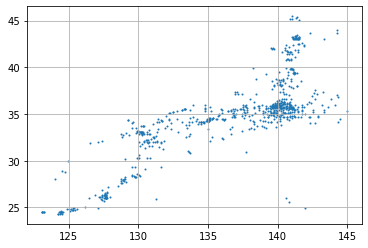

In [39]:
plt.scatter(waypoints_only2022["E_10"],waypoints_only2022["N_10"],s=1)
plt.grid(True)

In [40]:
sub=sub.fillna({'N_10':34.9,'E_10':138.2})

In [41]:
sub

,index,point_name,N_10,E_10
0,0,ABASA,24.439172,123.252322
1,1,ABASI,44.000319,144.142750
2,2,ABBOT,34.900000,138.200000
3,3,ABENO,34.592342,135.698769
4,4,ABKMA,37.095947,140.421667
...,...,...,...,...
2039,2039,ZELDA,34.322558,135.088317
2040,2040,ZOROH,33.911381,133.796692
2041,2041,ZUNDA,38.172353,140.452144
2042,2042,ZUSHI,35.057283,139.523889


In [42]:
sub=sub.drop("point_name",axis=1)
sub.columns=["0","1","2"]
sub.to_csv("submission.csv",index=False,header=None)
sub

,0,1,2
0,0,24.439172,123.252322
1,1,44.000319,144.142750
2,2,34.900000,138.200000
3,3,34.592342,135.698769
4,4,37.095947,140.421667
...,...,...,...
2039,2039,34.322558,135.088317
2040,2040,33.911381,133.796692
2041,2041,38.172353,140.452144
2042,2042,35.057283,139.523889
